# TP2



In [3]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt # pip install PyQt5

In [117]:
def create_gauss_filter(h, w, k_size, sigma):
    # Crear un kernel gaussiano en el dominio espacial
    kernel = cv.getGaussianKernel(k_size, sigma)
    
    # Expandir el kernel a 2D
    kernel_2d = np.outer(kernel, kernel.T)
    
    # Calcula la cantidad de píxeles que se deben agregar tanto en la parte superior como en la parte inferior del kernel
    pad_h = (h - k_size) // 2
    # Si la diferencia entre h y k_size es impar, agrega un píxel adicional en la parte inferior para mantener la simetría
    if (h - k_size) % 2 != 0:
        pad_h_bottom = pad_h + 1
    else:
        pad_h_bottom = pad_h

    # Calcula la cantidad de píxeles que se deben agregar tanto en el lado izquierdo como en el lado derecho del kernel
    pad_w = (w - k_size) // 2
    # Si la diferencia entre w y k_size es impar, agrega un píxel adicional en el lado derecho para mantener la simetría
    if (w - k_size) % 2 != 0:
        pad_w_right = pad_w + 1
    else:
        pad_w_right = pad_w

    # Realiza el relleno con las cantidades calculadas
    gauss_filter = np.pad(kernel_2d, ((pad_h, pad_h_bottom), (pad_w, pad_w_right)), 'constant')

    
    # Calcular la transformada de Fourier del filtro gaussiano
    gauss_filter_fft = np.fft.fft2(gauss_filter)
    return gauss_filter, gauss_filter_fft

In [122]:
def getImgFilters(img,k_size,sigma):    
    h, w = img.shape
    kernel, kernel_tf = create_gauss_filter(h, w, k_size, sigma)

    img_fft = np.fft.fft2(img)
    filtered = img_fft * kernel_tf

    img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

    plt.figure(figsize=(12,12))
    plt.subplot(1,3,1)
    plt.axis('off')
    plt.title("Kernel Gausiano")
    plt.imshow(kernel, cmap='jet')
    plt.subplot(1,3,2)
    plt.axis('off')
    plt.title("FFT del kernel")
    tf_shifted = np.fft.fftshift(kernel_tf)
    plt.imshow(np.abs(tf_shifted), cmap='jet')
    plt.subplot(1,3,3)
    plt.axis('off')
    plt.imshow(img_gauss, cmap='gray')
    plt.title('Desenfoque gausiano')
    return img_gauss

**1. Graficar ambas representciones para diferentes tamanhos de kernel y sigma
Aplicar el filtro a una imagen para validarel funcionamiento en el dominio 
espectral**

array([[220.92330803, 219.81057967, 219.49461057, ..., 224.3151044 ,
        223.19553931, 222.05169457],
       [219.73681278, 218.87850331, 218.56322753, ..., 222.15267791,
        221.41772255, 220.59252259],
       [219.45544638, 218.56322753, 218.28467719, ..., 221.91186809,
        221.14002927, 220.31189844],
       ...,
       [222.37189453, 219.97336074, 219.69416027, ..., 230.248683  ,
        227.55591238, 224.93841701],
       [222.3373226 , 220.48391838, 220.16790035, ..., 228.38847191,
        226.31865712, 224.29120028],
       [221.86127455, 220.43963615, 220.12147841, ..., 226.36945691,
        224.83980789, 223.31995902]])

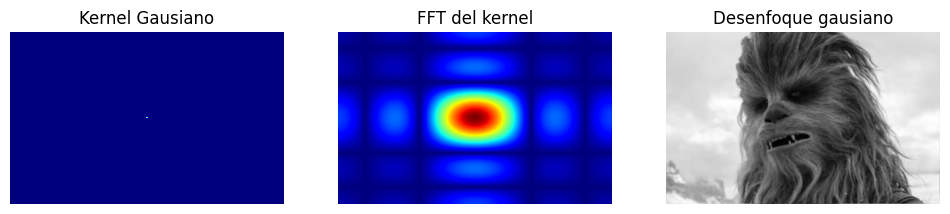

In [123]:
img = cv.imread('chewbacca.jpg', cv.IMREAD_GRAYSCALE)
getImgFilters(img,5,5)

array([[221.87110137, 221.10596417, 220.44614896, ..., 224.44107713,
        223.58708918, 222.70275255],
       [221.30636728, 220.63277569, 220.05315552, ..., 223.57337295,
        222.82194369, 222.03826552],
       [220.77919572, 220.19174342, 219.68708425, ..., 222.76072817,
        222.10618954, 221.417083  ],
       ...,
       [223.35443375, 222.31931098, 221.42644233, ..., 226.85575127,
        225.67926231, 224.4860355 ],
       [222.93140457, 221.98360933, 221.16565322, ..., 226.12497283,
        225.05610463, 223.96494793],
       [222.43259276, 221.57434106, 220.83403184, ..., 225.31545889,
        224.35443083, 223.36624029]])

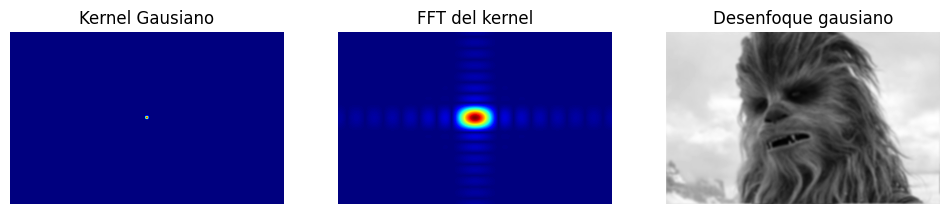

In [124]:
getImgFilters(img,15,5)

array([[220.99515347, 219.83815067, 219.51840079, ..., 224.35719955,
        223.23720127, 222.11570186],
       [219.75855002, 218.8799004 , 218.56020011, ..., 222.12204957,
        221.4011005 , 220.59954891],
       [219.47845093, 218.56020011, 218.28029952, ..., 221.88199952,
        221.12125013, 220.3194996 ],
       ...,
       [222.39824953, 219.92334913, 219.64339913, ..., 230.09059664,
        227.44724979, 224.92119697],
       [222.35855202, 220.44274973, 220.12299966, ..., 228.28679883,
        226.24490107, 224.28070002],
       [221.91630179, 220.43999858, 220.12009954, ..., 226.36064633,
        224.83999926, 223.3574998 ]])

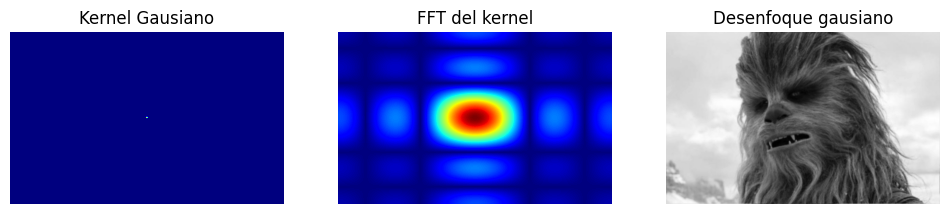

In [125]:
getImgFilters(img,5,20)

array([[224.56077846, 224.51950773, 224.48738698, ..., 224.72036027,
        224.6636018 , 224.60988236],
       [224.2760557 , 224.23390807, 224.20047181, ..., 224.43635134,
        224.37935719, 224.32545437],
       [223.99170557, 223.94843415, 223.91342745, ..., 224.15403999,
        224.09641806, 224.04179548],
       ...,
       [225.46101791, 225.42038009, 225.39073213, ..., 225.62260353,
        225.56578066, 225.51105793],
       [225.15194448, 225.11165343, 225.08207806, ..., 225.31245062,
        225.2557074 , 225.20136269],
       [224.8514533 , 224.81076277, 224.77993602, ..., 225.01113306,
        224.95451236, 224.90055695]])

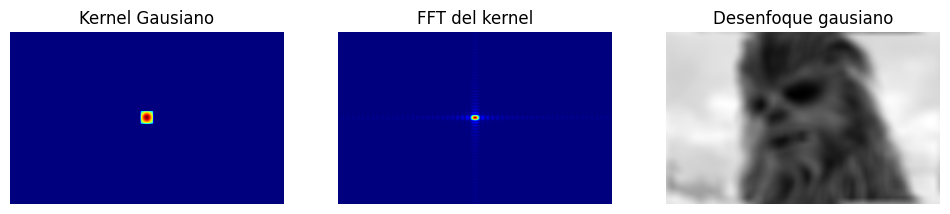

In [126]:
getImgFilters(img,55,25)

**- Cabe destacar que cuando mas grande el kernel mas pequenha la transformada 
del kernel segun lo descripto en los graficos**

**2. Usando el método descripto en el paper "Image Sharpness Measure for 
Blurred Images in Frequency Domain" comparar el resultado de un filtrado por 
convolución con el filtrado espectral.**

In [109]:
def imageSharpnessScore(img):
    w, h = img.shape
    F = np.fft.fft2(img)
    Fc = np.fft.ifftshift(np.real(F))
    AF = np.abs(Fc)
    M = np.max(AF)
    thres= M/1000
    Th=np.where(F>thres)[0].shape
    FM=Th[0]/(w*h)
    return FM

Puntaje imagen original: 0.0008917548500881835
Puntaje imagen con filtro gaussiano: 0.0002171516754850088
Puntaje imagen con filtro gaussiano por convolucion: 0.00028328924162257497


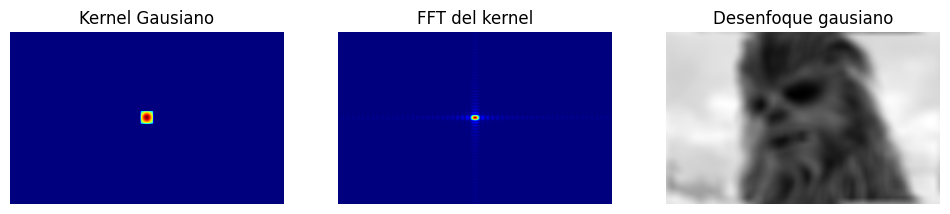

In [129]:
ksize=5
sigma=5
img = cv.imread('chewbacca.jpg', cv.IMREAD_GRAYSCALE)
img_gauss=getImgFilters(img,k_size,sigma)
img_conv = cv.GaussianBlur(img, ksize=(k_size, k_size), sigmaX=sigma,  sigmaY=sigma)
print("Puntaje imagen original:",imageSharpnessScore(img))
print("Puntaje imagen con filtro gaussiano:",imageSharpnessScore(img_gauss))
print("Puntaje imagen con filtro gaussiano por convolucion:",imageSharpnessScore(img_conv))

Puntaje imagen original: 0.0008917548500881835
Puntaje imagen con filtro gaussiano: 0.0005698853615520282
Puntaje imagen con filtro gaussiano por convolucion: 0.000607363315696649


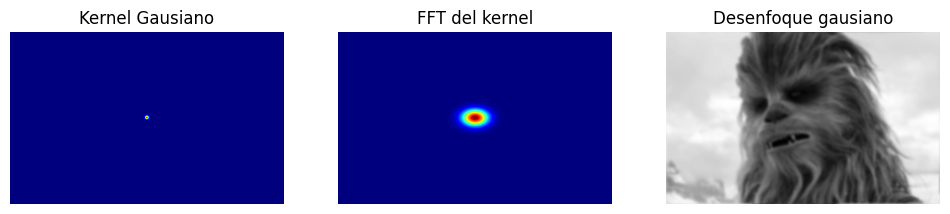

In [130]:
ksize=15
sigma=5
img = cv.imread('chewbacca.jpg', cv.IMREAD_GRAYSCALE)
img_gauss=getImgFilters(img,k_size,sigma)
img_conv = cv.GaussianBlur(img, ksize=(k_size, k_size), sigmaX=sigma,  sigmaY=sigma)
print("Puntaje imagen original:",imageSharpnessScore(img))
print("Puntaje imagen con filtro gaussiano:",imageSharpnessScore(img_gauss))
print("Puntaje imagen con filtro gaussiano por convolucion:",imageSharpnessScore(img_conv))

Puntaje imagen original: 0.0008917548500881835
Puntaje imagen con filtro gaussiano: 0.00023037918871252205
Puntaje imagen con filtro gaussiano por convolucion: 0.0002943121693121693


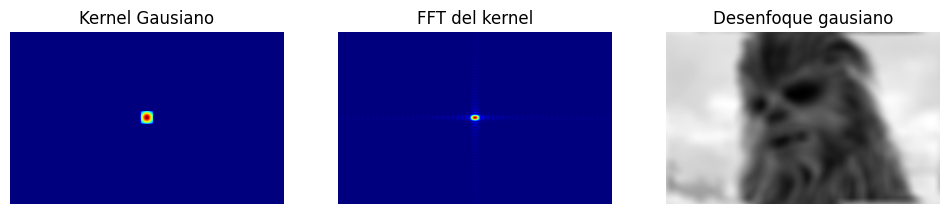

In [131]:
ksize=5
sigma=20
img = cv.imread('chewbacca.jpg', cv.IMREAD_GRAYSCALE)
img_gauss=getImgFilters(img,k_size,sigma)
img_conv = cv.GaussianBlur(img, ksize=(k_size, k_size), sigmaX=sigma,  sigmaY=sigma)
print("Puntaje imagen original:",imageSharpnessScore(img))
print("Puntaje imagen con filtro gaussiano:",imageSharpnessScore(img_gauss))
print("Puntaje imagen con filtro gaussiano por convolucion:",imageSharpnessScore(img_conv))

Puntaje imagen original: 0.0008917548500881835
Puntaje imagen con filtro gaussiano: 0.0002171516754850088
Puntaje imagen con filtro gaussiano por convolucion: 0.00028328924162257497


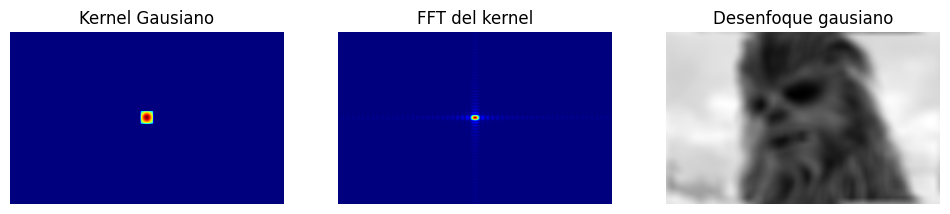

In [132]:
ksize=55
sigma=25
img = cv.imread('chewbacca.jpg', cv.IMREAD_GRAYSCALE)
img_gauss=getImgFilters(img,k_size,sigma)
img_conv = cv.GaussianBlur(img, ksize=(k_size, k_size), sigmaX=sigma,  sigmaY=sigma)
print("Puntaje imagen original:",imageSharpnessScore(img))
print("Puntaje imagen con filtro gaussiano:",imageSharpnessScore(img_gauss))
print("Puntaje imagen con filtro gaussiano por convolucion:",imageSharpnessScore(img_conv))